In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, gamma

# Linear Regression Models and Least Squares

First, let's define the notations used in this example:
   * $\mathbf{X}$ is a matrix of inputs with size $N \times p$, where $N$ is the number of obervations and $p$ is the number of columns/ features / dimension.
   
       * Note that
       
       $$\mathbf{X} = \begin{bmatrix}x_{11} & x_{12} & \cdots & x_{1p} \\ x_{21} & x_{22} & \cdots & x_{2p} \\ \vdots & \cdots & \cdots & \vdots\\x_{N1} & \cdots & \cdots & x_{Np}\end{bmatrix}$$
       
       where $x_{ij}$ denotes the $i^{th}$ observation (row) of the $j^{th}$ feature of $\mathbf{X}$, $X_k$ denotes the $k^{th}$ column of $\mathbf{X}$ and $x_i$ denotes the $i^{th}$ row of $\mathbf{X}$.
       
   * $\mathbf{Y}$ is a matrix of outputs with size $N \times q$, where $q$ is the number of outputs. In this example, we have only one output.
   
   * $\beta = [\beta_1, \beta_2, \cdots, \beta_p]^\top$ is a vector of parameters with size $p$.
   
   * Any variables with a  $\hat{}$ on top  denote predicted / estimated variables.
   
   * $\mathbf{e}$ denotes a vector of ones with an appropriate size.

### Residuals and the least squares criterion
If $\hat\beta$ is a vector of estimates of the actual $\beta$, then the prediction model can be written as
$$\mathbf{Y} = \mathbf{X}\hat\beta + e$$
where $e$ is a vector of residual or error between $\mathbf{Y}$ and $\hat{\mathbf{Y}}$.

The residual/error $e$ can be computed using the data and $\hat\beta$ by means of
$$e=\mathbf{Y}-\mathbf{X}\beta$$
The most popular method to fit the linear model to the training data is *least squares*, which minimizes the residual sum of squares (RSS) of errors w.r.t to $\beta$:

$$\begin{aligned}RSS(\beta)&=\sum_{i=1}^N e_i^2=\sum_{i=1}^N (Y_i - x_{i}\hat\beta)^2\\ 
&= (\mathbf{Y} - \mathbf{X}\hat\beta)^\top(\mathbf{Y} - \mathbf{X}\hat\beta)\\&=\mathbf{Y}^\top\mathbf{Y}-\mathbf{Y}^\top\mathbf{X}\hat\beta-\hat\beta^\top\mathbf{X}^\top\mathbf{Y} + \hat\beta^\top\mathbf{X}^\top\mathbf{X}\hat\beta\end{aligned}$$
To compute $\hat\beta$ that minimizes the $RSS(\beta)$:
$$\frac{\partial RSS(\hat\beta)}{\partial\hat\beta} = -2\mathbf{X}^\top\mathbf{Y}+2\mathbf{X}^\top\mathbf{X}\hat\beta=0$$
which gives the normal equation
$$\mathbf{X}^\top\mathbf{X}\hat\beta=\mathbf{X}^\top\mathbf{Y}$$

Solving this for $\beta$, we obtain:
$$\hat\beta = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\mathbf{Y}$$

provided that $(\mathbf{X}^\top\mathbf{X})^{-1}$ exists, or in other words $\mathbf{X}$ should have rank $p$. In particular, this requires that $N\geq p$ (number of observations is greater than or equal the number of parameters).

The fitted values at the inputs are:

$$\begin{aligned}\hat{\mathbf{Y}} &= \mathbf{X}\hat\beta=\mathbf{X}(\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\mathbf{Y}\\&=\mathbf{H}\mathbf{Y}\end{aligned}$$

The matrix $\mathbf{H}$ is called the *hat* matrix because it puts the hat on $\mathbf{Y}$.

### Variance of Least Squares Estimators $\hat\beta$

We now assume that the observations $y_i$ are uncorrelated and have *homoscedastic* errors, and $x_i$ are non random. The variance-covariance matrix of the least squares estimators is given by

$$\text{var}(\hat\beta) = (\mathbf{X}^\top\mathbf{X})^{-1} \sigma^2$$

###### **proof**:

$$\begin{aligned}\text{var}(\hat\beta) &= \text{var}\left((\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\mathbf{Y}\right)\end{aligned}$$

If we use the property $\text{var}(\mathbf{A}\mathbf{Y}) = \mathbf{A}\text{var}(\mathbf{Y})\mathbf{A}^\top$, for non stochastic $\mathbf{A}$, we get the following

$$\begin{aligned}\text{var}(\hat\beta) &= (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\underbrace{\text{var}(\mathbf{Y})}_{\sigma^2\mathbf{I_N}}((\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top)^\top\\
&=(\mathbf{X}^\top\mathbf{X})^{-1}(\mathbf{X}^\top\mathbf{X})(\mathbf{X}^\top\mathbf{X})^{-1}\sigma^2 \\
&=(\mathbf{X}^\top\mathbf{X})^{-1}\sigma^2 \end{aligned}$$

The actual variance $\sigma^2$ is not known, typically we estimate it by:

$$\hat\sigma^2 = \frac{1}{N - p - 1} \sum_{i=1}^{N}(y_i - \hat y_i)^2$$

Th $N-p-1$ makes $\hat\sigma^2$ an unbiased estimate of $\sigma^2$.

###### **proof**:
We start with the residual $e = \mathbf{Y} - \hat{\mathbf{Y}}$:

$$\begin{aligned}
e &= \mathbf{Y} - \hat{\mathbf{Y}} = \mathbf{Y} - \mathbf{X}\hat\beta\\
&= \mathbf{Y} - \mathbf{X}(\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top \mathbf{Y}\\
&= (\mathbf{I}_N - \mathbf{X}(\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top)\mathbf{Y}\\
&= (\mathbf{I}_N - \mathbf{H})\mathbf{Y}
\end{aligned}$$

Use the property $u^\top u = \text{Tr}(uu^\top)$, where $\text{Tr}$ is the [Trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)) operator:

$$\begin{aligned}\text{E}[e^\top e] &= \text{E}[\text{Tr}(ee^\top)]\\
&=\text{E}[\text{Tr}\left((\mathbf{I}_N - \mathbf{H})\mathbf{Y}\mathbf{Y}^\top(\mathbf{I}_N - \mathbf{H})^\top\right))\\
&=\text{Tr}\left((\mathbf{I}_N - \mathbf{H})\underbrace{\text{E}[\mathbf{Y}\mathbf{Y}^\top]}_{\mathbf{I}_N\sigma^2}(\mathbf{I}_N - \mathbf{H})\right)\\
&= \text{Tr}\left(\mathbf{I}_N^2 - 2\mathbf{H} + \mathbf{H}^2\right)\mathbf{I}_N\sigma^2
\end{aligned}$$

since $\mathbf{H}$ is [idempotent](https://en.wikipedia.org/wiki/Idempotent_matrix), i.e., $\mathbf{H}^2 = \mathbf{H}$, and $\text{Tr}(\mathbf{H}) = \text{rank}(\mathbf{H})= \text{rank}(\mathbf{X}) = p + 1$ (the term $p+1$ appears because of the intercept), we obtain the following:

$$\begin{aligned}
\text{E}[e^\top e] =&\left(\text{Tr}(\mathbf{I}_N) - \text{Tr}(\mathbf{H})\right)\sigma^2\\
&=(N - p - 1)\sigma^2
\end{aligned}$$

Therefore, the estimate of the variance is given by:

$$\hat\sigma^2 =\frac{1}{N - p - 1}\text{E}[e^\top e]=\frac{1}{N - p - 1}\sum_{i=1}^{N}(y_i -\hat{y}_i)^2$$

### Hypothesis Testing
To test the hypothesis that a particular coefficient $\beta_j=0$, we form the standardized coefficient or *Z-score*:
$$z_j = \frac{\hat\beta_j}{\hat\sigma\sqrt{v_j}}$$

where $v_j$ is the $j^{th}$ diagonal element of $\mathbf{X}^\top\mathbf{X}$.

   * Under the null hypothesis that $\beta_j=0$, $z_j$ is distributed as $t_{dof}$ ($\text{dof} = \text{degree of freedom} = N-p-1$). It means a large (absolute) value of $z_j$ leads to rejection of this hypothesis.
   * If $\hat\sigma$ is replaced by the actual $\sigma$, $z_j$ would have a standard normal distribution. The difference between the tail quantiles of a $t$-distribution and a standard normal become negligible as the sample size increases.

### Generating The Tail Probabilities $P(|Z| > z)$ for $t_{30}$, $t_{100}$, and Normal Distributions
This section is the python implementation to generate Figure 3.3 in the book.

#### Set up PDF and CDF for Student's-$t$ and normal distributions
For normal distribution with 0 mean and standard deviation:

$$\text{pdf}_{norm}(x) = \text{P}_{norm}(x) = \frac{1}{\sqrt{2\pi}} e^{\frac{1}{2}x^2}$$

$$\text{pdf}_{t}(x, \nu) = \text{P}_{t}(x) = \frac{\Gamma((\nu+1)/2)}{\sqrt{\pi\nu}\Gamma(\nu/2)}\left(1+x^2/\nu\right)^{-(\nu+1)/2}$$

where $\nu >0$ is the degress of fredom parameters, and $\Gamma$ is the gamma function.

The CDF for both PDFs is defined as:
$$\text{cdf}_X(x) = \text{P}(X \leq x)$$

$\text{P}(X \leq x)$ represents the accumulation of all probabilities where the random variable $X$ takes on a value less than or equal to $x$.

The following classes are developed to generates both normal and $t$ probabilites along with their CDFs.

In [2]:
# I fell like writing my own pdf and cdf
# this class is for Gaussian distribution
class Gaussian:
    def __init__(self, *args, **kwargs):
        self.num_data = kwargs.get('num_data', 10001)
        
        # this is to get the all possible values so we can compute the cdf
        np.random.seed(0)
        data = np.random.randn(self.num_data)
        data_min = data.min()
        data_max = data.max()
        self.x_data = np.linspace(data_min, data_max, self.num_data)
    
    def pdf(self, **kwargs):
        self.p_x = np.exp(- (self.x_data ** 2) / 2) / np.sqrt(2 * pi)
        return self.p_x
    
    def cdf(self, x, **kwargs):
        p_x = self.pdf(**kwargs)
        cdf_temp = []
        for i in range(len(p_x)):
            temp = np.sum(p_x[:i + 1])
            cdf_temp.append(temp)
        
        # this is to generate cdf only for some specified range
        idx1 = np.argmin(np.abs(self.x_data - x[0]))
        idx2 = np.argmin(np.abs(self.x_data - x[-1]))

        if x[0] < x[-1]:
            self.x = self.x_data[idx1:idx2+1]
            return cdf_temp[idx1:idx2+1] / cdf_temp[-1]
        
        else:
            return cdf_temp[idx2:idx1+1][::-1] / cdf_temp[-1]

In [3]:
# this class is for Student's t distribution
# It's extending the Gaussian class
class StudentT(Gaussian): 
    def __init__(self, *args, **kwargs):
        super(StudentT, self).__init__(*args, **kwargs)
        
    def pdf(self, **kwargs):
        dof = kwargs.get('dof', 'None')
        
        # we use gamma function from math package
        self.p_x = (gamma((dof + 1) / 2) / (np.sqrt(pi * dof) * gamma(dof / 2))) * (1 + self.x_data ** 2 / dof) ** -((dof + 1) / 2)
        return self.p_x   

Here, we define the tail probabilities region and initialize the PDF classes

In [4]:
x = np.linspace(1.9, 3, 100)

gaussian = Gaussian()
student = StudentT()

#### Calculate $P(|Z| > z)$
Figure 3.3 presents the tail probabilities $P(|Z| > z)$. Therefore, we need to calculate it as follows:
$$\begin{aligned}P(|Z| > z) &= P(Z > z) + P(-Z > z)\\&= (1 - P(Z <z)) + P(Z < -z) \\&= 1 - cdf(z) + cdf(-z)\end{aligned}$$

The following codes calculate $P(|Z| > z)$:

In [5]:
# get the cdfs
# alternatively, we can use libs from scipy: scipy.stats.norm.cdf, scipy.stats.t.cdf
cdf_dict = dict()
cdf_dict['normal'] = 1 - gaussian.cdf(x) + gaussian.cdf(-x)
cdf_dict['t30'] = 1 - student.cdf(x, dof=30) + student.cdf(-x, dof=30)
cdf_dict['t100'] = 1 - student.cdf(x, dof=100) + student.cdf(-x, dof=100)

# get the new x for a specific range of x
Z = gaussian.x

#### Generate the plot of the tail probabilities

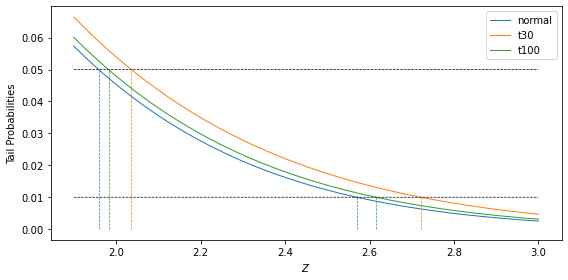

In [6]:
plt.figure(figsize=(8, 4))
# p values
p = [0.05, 0.01]
for i, key in enumerate(cdf_dict.keys()):
    plt.plot(Z, cdf_dict[key], color='C{}'.format(i), label=key, linewidth=1)
    for p_ in p:
        # find index where cdf = p_ or cdf ~= p_ because there is no data point where cdf = p exactly.
        idx = np.argmin(np.abs(cdf_dict[key] - p_))
        z_ = [Z[idx], Z[idx]]
        y_ = [0, p_]
        plt.plot(z_, y_, '--', color='C{}'.format(i), linewidth=0.7)
    
plt.xlabel('$Z$')
plt.ylabel('Tail Probabilities', rotation=90)
plt.legend()
plt.plot(Z, 0.05 * np.ones_like(Z), '--k', linewidth=0.7)
plt.plot(Z, 0.01 * np.ones_like(Z), '--k', linewidth=0.7)
plt.tight_layout()

### Simultaneous Test for the Significance of Groups of Coefficients

To do this test, we can use the *F statistic*:

$$ F = \frac{(RSS_0 - RSS_1) / (p_1 - p_0)}{RSS_1 / (N - p_1 - 1)}$$

where $RSS_1$ and $RSS_0$ are the residual sum-of-squares for the bigger model with $p_1+1$ parameters and for the smaller model with $p_0+1$ parameters, respectively.  The statistic measures the difference in the $RSS$ per additional parameter in the bigger model.